In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
df.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.126400,3.720500,0.68540,0.500000,0.157200,0.146800,0.203100,0.232500,0.461900,8.13200,170.757500,83.312419,28.478577,0.494700,0.875900,1.241600,0.972200,0.832100,0.485400,0.514600
std,1.116937,0.712201,0.46438,0.500025,0.364007,0.353924,0.402326,0.422447,0.498571,3.19875,10.448532,19.015909,5.609093,0.499997,1.250542,0.635822,0.384242,0.409544,0.499812,0.499812
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,140.000000,32.660000,12.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000,163.000000,68.950000,24.410000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,4.000000,1.00000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,170.000000,81.650000,27.800000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,4.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.00000,178.000000,95.250000,31.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.00000,201.000000,147.420000,46.340000,1.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000


In [4]:
df['Heart_Disease'].value_counts()

0    5000
1    5000
Name: Heart_Disease, dtype: int64

In [5]:
df['Sex_Female'].value_counts()

0    5146
1    4854
Name: Sex_Female, dtype: int64

In [6]:
df['General_Health'].value_counts()

2    3324
3    2737
1    1953
4    1113
0     873
Name: General_Health, dtype: int64

In [7]:
X = df.drop(['Heart_Disease'],axis=1)
y = df['Heart_Disease']

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
#X_train_scalled = scaler.fit_transform(X_train)

In [12]:
#X_test_scalled = scaler.fit_transform(X_test)

# PCA

In [13]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(0.90)

In [30]:
X_pca= pca.fit_transform(X)

In [31]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=101)

In [32]:
X_train_scalled = scaler.fit_transform(X_train_pca)

In [33]:
X_test_scalled = scaler.fit_transform(X_test_pca)

# Model Train

In [17]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,125,150]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',max_iter= 1000),
        'params': {
            'C': [1,5,10]
        }
    },
    
    'GaussianNB' : {
        'model' : GaussianNB(),
        'params':{}
    }
}

In [35]:
scores = []
best_estimator = {}
for mname, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv= 5,n_jobs= 6, return_train_score= False)
    clf.fit(X_train_scalled,y_train_pca)
    scores.append({
        'model': mname,
        'best_score': clf.best_score_,
        'best_param': clf.best_params_
    })
    best_estimator[mname] = clf.best_estimator_
    
pd.DataFrame(scores)

,model,best_score,best_param
0,svm,0.541000,"{'C': 5, 'kernel': 'linear'}"
1,random_forest,0.553286,{'n_estimators': 150}
2,logistic_regression,0.542714,{'C': 5}
3,GaussianNB,0.543000,{}


In [36]:
best_estimator

{'svm': SVC(C=5, gamma='auto', kernel='linear'),
 'random_forest': RandomForestClassifier(n_estimators=150),
 'logistic_regression': LogisticRegression(C=5, max_iter=1000, solver='liblinear'),
 'GaussianNB': GaussianNB()}

In [53]:
model = best_estimator['svm']

In [54]:
y_pred = model.predict(X_test_pca)

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
cm = confusion_matrix(y_test_pca,y_pred)

Text(50.722222222222214, 0.5, 'predicted')

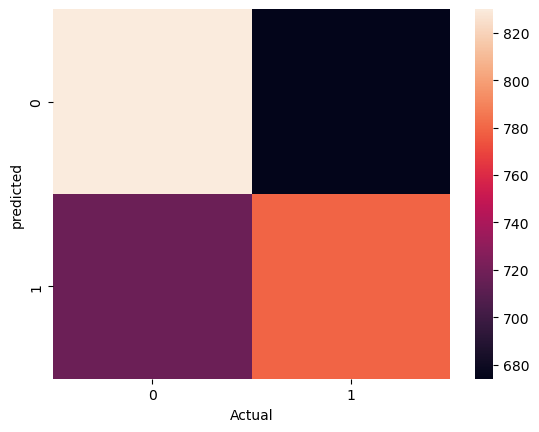

In [57]:
import seaborn as sns
sns.heatmap(cm)
import matplotlib.pyplot as plt
plt.xlabel('Actual')
plt.ylabel('predicted')

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1504
           1       0.54      0.52      0.53      1496

    accuracy                           0.54      3000
   macro avg       0.54      0.54      0.54      3000
weighted avg       0.54      0.54      0.54      3000



In [59]:
import joblib

joblib.dump(model,'model.pkl')

['model.pkl']